# **DEP (Task 1)**
## Maham Abbas



# **Objective**


---
**Given the "Retail Transaction Dataset", the objective is to utilize historical transaction data to segment customers based on their purchasing behaviour, enabling the development of targeted marketing strategies, promotions and improve customer retention.**

---






---


# **Data Exploration**

---





###   **Importing Libraries**



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



###    **Loading The Dataset**







In [70]:
df = pd.read_csv("Retail_Transactions_Dataset.csv")
df

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter,NaN
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter,NaN
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One)


### **Displaying Header Data**

In [71]:
df.head(0)

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion


### **Displaying Columns Labels**

In [72]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

### **Removing spaces from Column Names**

In [73]:
df.columns = df.columns.str.strip()
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Product', 'Total_Items',
       'Total_Cost', 'Payment_Method', 'City', 'Store_Type',
       'Discount_Applied', 'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

### **Displaying Datatypes of Each column**

In [74]:
df.dtypes

Transaction_ID         int64
Date                  object
Customer_Name         object
Product               object
Total_Items            int64
Total_Cost           float64
Payment_Method        object
City                  object
Store_Type            object
Discount_Applied        bool
Customer_Category     object
Season                object
Promotion             object
dtype: object

### **Displaying Descriptive Statistics of Numerical Columns In Data.**

In [75]:
df.describe()

,Transaction_ID,Total_Items,Total_Cost
count,1.000000e+06,1000000.000000,1000000.000000
mean,1.000500e+09,5.495941,52.455220
std,2.886753e+05,2.871654,27.416989
min,1.000000e+09,1.000000,5.000000
25%,1.000250e+09,3.000000,28.710000
50%,1.000500e+09,5.000000,52.420000
75%,1.000750e+09,8.000000,76.190000
max,1.001000e+09,10.000000,100.000000


### **Counting Number of Empty Rows**

In [76]:
missing_values = df.isnull().sum()
missing_values

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

### **Displaying Unique Values in Categorical Columns**

In [77]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nUnique values in {column}:")
    print(df[column].unique())


Unique values in Date:
['2022-01-21 06:27:29' '2023-03-01 13:01:21' '2024-03-21 15:37:04' ...
 '2021-09-03 13:59:39' '2023-10-17 05:50:40' '2020-06-15 11:58:49']

Unique values in Customer_Name:
['Stacey Price' 'Michelle Carlson' 'Lisa Graves' ... 'Gary Salas'
 'Shaun Wilkerson' 'Blake Richard']

Unique values in Product:
["['Ketchup', 'Shaving Cream', 'Light Bulbs']"
 "['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'Potatoes']" "['Spinach']"
 ... "['Pickles', 'Carrots', 'Peanut Butter', 'Sponges', 'BBQ Sauce']"
 "['Diapers', 'Coffee', 'Coffee', 'Mop']" "['Trash Cans', 'Mop', 'Jam']"]

Unique values in Payment_Method:
['Mobile Payment' 'Cash' 'Credit Card' 'Debit Card']

Unique values in City:
['Los Angeles' 'San Francisco' 'Houston' 'Chicago' 'Boston' 'New York'
 'Seattle' 'Miami' 'Dallas' 'Atlanta']

Unique values in Store_Type:
['Warehouse Club' 'Specialty Store' 'Department Store' 'Pharmacy'
 'Supermarket' 'Convenience Store']

Unique values in Customer_Category:
['Homemaker' 'Profes

### **Checking if "Customer_Name" and other required columns exist**

In [78]:
if 'Customer_Name'in df.columns and 'Date' in df.columns:

    # Convert 'Date' Column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Create 'TotalPrice' Feature
    df['TotalPrice'] = df['Total_Items'] * df['Total_Cost']

    print(df.head())
else:
    print("Columns do not exist.")

   Transaction_ID                Date      Customer_Name  \
0      1000000000 2022-01-21 06:27:29       Stacey Price   
1      1000000001 2023-03-01 13:01:21   Michelle Carlson   
2      1000000002 2024-03-21 15:37:04        Lisa Graves   
3      1000000003 2020-10-31 09:59:47  Mrs. Patricia May   
4      1000000004 2020-12-10 00:59:59     Susan Mitchell   

                                             Product  Total_Items  Total_Cost  \
0        ['Ketchup', 'Shaving Cream', 'Light Bulbs']            3       71.65   
1  ['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...            2       25.93   
2                                        ['Spinach']            6       41.49   
3                             ['Tissues', 'Mustard']            1       39.34   
4                                      ['Dish Soap']           10       16.42   

   Payment_Method           City        Store_Type  Discount_Applied  \
0  Mobile Payment    Los Angeles    Warehouse Club              True   
1       



---
# **Data Cleaning And Preprocessing**
---



### **Handling missing values**


In [79]:
df.dropna(subset = ['Customer_Name'], inplace = True)
df


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,TotalPrice
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN,214.95
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),51.86
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN,248.94
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN,39.34
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,164.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter,NaN,22.07
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items,642.00
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter,NaN,182.22
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One),70.44


### **Removing Duplicates**



In [80]:
df.drop_duplicates(inplace=True)



---


# **Exploratory Data Analysis (EDA)**


---



### **Distribution Of Total Prices**

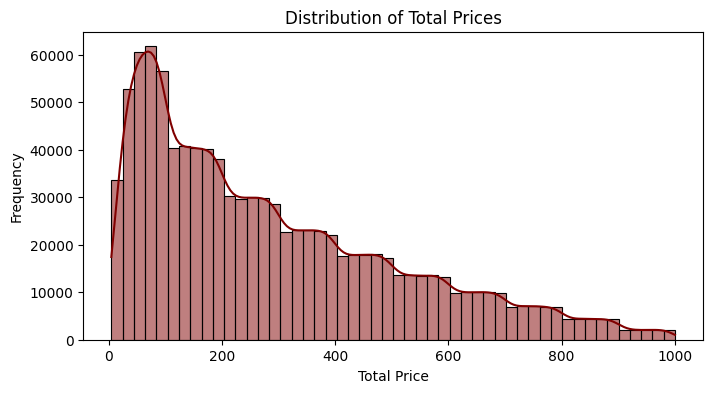

In [81]:
plt.figure(figsize=(8,4))
sns.histplot(df['TotalPrice'],bins=50, kde=True, color= 'maroon')
plt.title('Distribution of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()


### **Top most sold products**

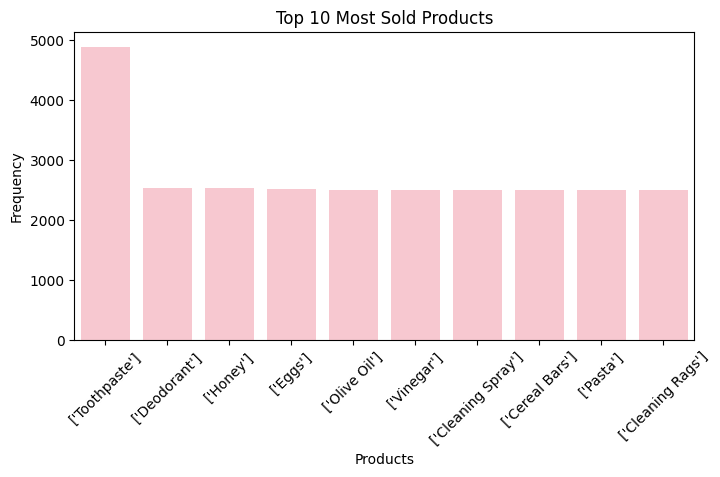

In [82]:
top_products = df['Product'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_products.index, y=top_products.values, color='pink')
plt.title('Top 10 Most Sold Products')
plt.xticks(rotation=45)
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.show()



---
# **Feature Engineering**


---





### **Extracting Time Based Features**

In [83]:
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month


### **Aggregating Data By Customer**

In [84]:
customer_behavior = df.groupby('Customer_Name').agg({
    'TotalPrice' : 'sum',
    'Transaction_ID' : 'count',
    'Hour' : lambda x : x.mode()[0],
    'DayOfWeek' : lambda x : x.mode()[0],
    'Month' : lambda x : x.mode()[0]
}).rename(columns = {
    'TotalPrice' : 'TotalSpent',
    'Transaction_ID' : 'TotalPurchases'
}).reset_index()

scaler = StandardScaler()
customer_behavior_scaled = scaler.fit_transform(customer_behavior[['TotalSpent','TotalPurchases','Hour','DayOfWeek','Month']])



---


# **Clustering Algorithms (K-means)**


---



### **Determining Number of Clusters Using Elbow Method**

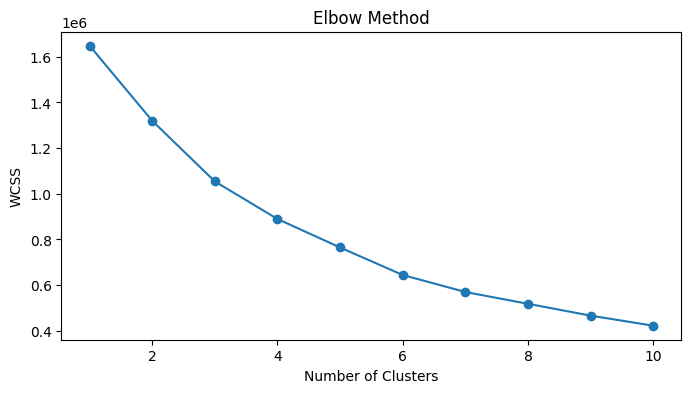

In [85]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(customer_behavior_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### **Fitting K-means with number of clusters**

In [93]:
optimal_clusters = 5
kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
customer_behavior['Cluster'] = kmeans.fit_predict(customer_behavior_scaled)

### **Silhouette Score**

In [94]:
silhouette_avg = silhouette_score(customer_behavior_scaled, customer_behavior['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.2683327881887059




---


# **Visualization Of Customer Segments**


---



### **Plot Clusters**

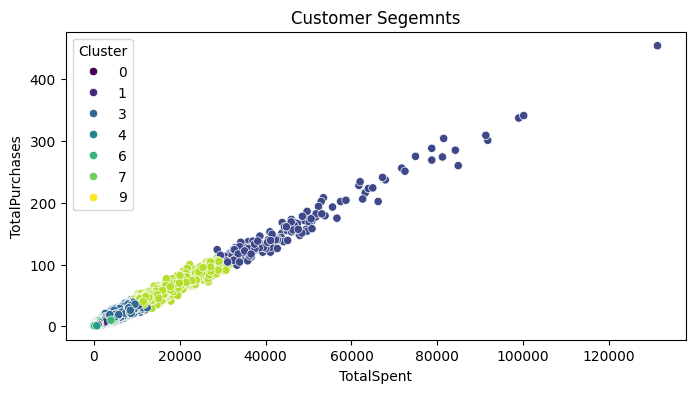

In [88]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = customer_behavior, x = 'TotalSpent', y='TotalPurchases', hue = 'Cluster', palette = 'viridis')
plt.title('Customer Segemnts')
plt.show()

### **Creating 'Total Price' Column**

In [89]:
df['TotalPrice'] = df['Total_Items'] * df['Total_Cost']

### **Identifying Numeric Columns**

In [90]:
numeric_columns = ['Total_Items','Total_Cost', 'TotalPrice']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors = 'coerce')


### **Grouping By Customer Identifier**

In [91]:
customer_behavior = df.groupby('Customer_Name').agg({
    'TotalPrice' : 'sum',
    'Total_Items' : 'sum',
    'Total_Cost' : 'sum'
}).reset_index()

print(customer_behavior)

        Customer_Name  TotalPrice  Total_Items  Total_Cost
0       Aaron Acevedo     1051.65           13      279.85
1        Aaron Acosta      921.24           13      215.32
2         Aaron Adams     5319.39           77      772.36
3        Aaron Adkins      683.69           11      118.52
4       Aaron Aguilar     1652.11           32      236.76
...               ...         ...          ...         ...
329733     Zoe Wilson      531.28           10      126.80
329734       Zoe Wong       21.32            4        5.33
329735       Zoe Wood       21.82            1       21.82
329736   Zoe Woodward      186.21            3       62.07
329737       Zoe York      703.08            9       78.12

[329738 rows x 4 columns]
